In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df=pd.read_csv('SampleSuperstore.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.isnull().sum()
df.drop_duplicates(inplace=True)
desc=df.describe()
print(desc)

        Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


In [8]:
df.select_dtypes(include='object').columns:print(f"Mode of {'Ship Mode'}:{df['Ship Mode'].mode()[0]}")

Mode of Ship Mode:Standard Class


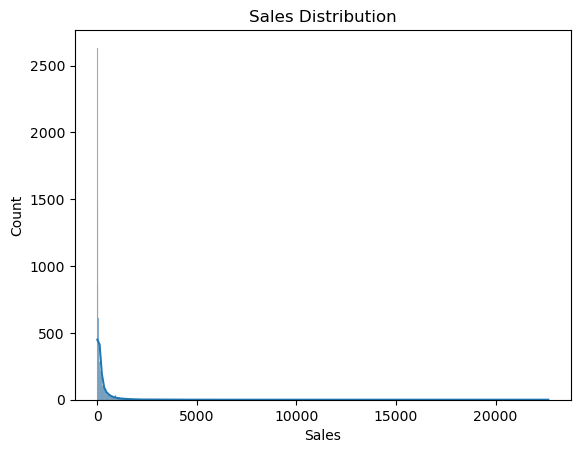

In [9]:
sns.histplot(df['Sales'],kde=True)
plt.title('Sales Distribution')
plt.show()

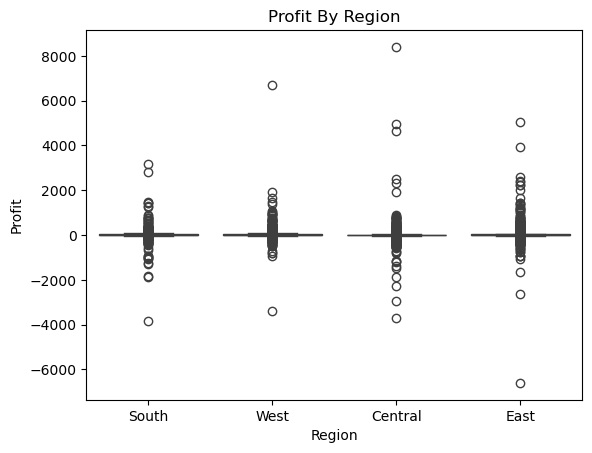

In [10]:
sns.boxplot(x='Region',y='Profit',data=df)
plt.title('Profit By Region')
plt.show()

In [11]:
from scipy.stats import ttest_1samp

west_profit=df[df['Region']=='West']['Profit']
t_stat,p_val=ttest_1samp(west_profit,0)
print(f"T-Statistic:{t_stat},P-value:{p_val}")

T-Statistic:10.99416858167922,P-value:1.26788009928757e-27


In [12]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(df['Category'],df['Ship Mode'])
chi2,p,dof,expected=chi2_contingency(contingency_table)
print(f"Chi2:{chi2},P-Value:{p}")

Chi2:3.5681140858826272,P-Value:0.7348864667898332


In [13]:
from scipy.stats import  f_oneway

regions=df['Region'].unique()
region_sales=[df[df['Region']==r]['Sales']for r in regions]

f_stat,p_val=f_oneway(*region_sales)
print(f"F-Statistic:{f_stat},P-Value:{p_val}")

F-Statistic:0.7826174367709536,P-Value:0.503445685864768


In [15]:
desc.to_csv('summary_statistics.csv',index=False)